## Data Wrangling

In [2]:
import pandas as pd

# Ganti nama file dan path sesuai dengan kebutuhan Anda
data_df = pd.read_excel("Data_Ekspor_Impor_Indonesia_Bulanan_2014_2023.xlsx")
data_df.head()


,Bulan,Nilai Ekspor (US $),Berat Ekspor (KG),Nilai Impor (US $),Berat Impor (KG)
0,2014-01-01,1.447229e+10,4.915438e+10,1.491623e+10,11590996964
1,2014-02-01,1.463409e+10,4.341624e+10,1.379066e+10,10640029636
2,2014-03-01,1.519263e+10,4.929496e+10,1.452372e+10,11439923450
3,2014-04-01,1.429247e+10,4.554173e+10,1.625498e+10,13005419405
4,2014-05-01,1.482360e+10,4.741763e+10,1.477034e+10,12197088101


## Assessing Data

In [3]:
# Info Jumlah kolom dan baris, Nama kolom beserta tipe datanya, Jumlah nilai non-null dan penggunaan memori
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Bulan                117 non-null    datetime64[ns]
 1   Nilai Ekspor (US $)  117 non-null    float64       
 2   Berat Ekspor (KG)    117 non-null    float64       
 3   Nilai Impor (US $)   117 non-null    float64       
 4   Berat Impor (KG)     117 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 4.7 KB


In [4]:
# menghitung jumlah nilai unik (distinct) untuk setiap kolom dalam DataFrame
unique_counts = data_df.nunique()
print(unique_counts)


Bulan                  117
Nilai Ekspor (US $)    117
Berat Ekspor (KG)      117
Nilai Impor (US $)     117
Berat Impor (KG)       117
dtype: int64


In [5]:
# jumlah duplikasi dalam DataFrame
print("Jumlah duplikasi: ", data_df.duplicated().sum())
data_df.describe()

Jumlah duplikasi:  0


,Bulan,Nilai Ekspor (US $),Berat Ekspor (KG),Nilai Impor (US $),Berat Impor (KG)
count,117,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02
mean,2018-10-31 12:18:27.692307712,1.595745e+10,4.905517e+10,1.451617e+10,1.359644e+10
min,2014-01-01 00:00:00,9.649504e+09,2.711630e+10,8.438627e+09,9.777959e+09
25%,2016-06-01 00:00:00,1.324488e+10,4.414627e+10,1.238515e+10,1.239700e+10
50%,2018-11-01 00:00:00,1.449624e+10,4.861941e+10,1.443465e+10,1.347401e+10
75%,2021-04-01 00:00:00,1.839841e+10,5.415204e+10,1.629362e+10,1.461803e+10
max,2023-09-01 00:00:00,2.792870e+10,6.390286e+10,2.196242e+10,1.876940e+10
std,NaN,4.157289e+09,6.332245e+09,2.883556e+09,1.767308e+09


In [6]:
# menghitung jumlah nilai yang hilang (NaN atau null)
missing_values = data_df.isna().sum()
print(missing_values)

Bulan                  0
Nilai Ekspor (US $)    0
Berat Ekspor (KG)      0
Nilai Impor (US $)     0
Berat Impor (KG)       0
dtype: int64


## Cleaning Data

### Memperbaiki Tipe Data

In [7]:
# mengganti tipe Data "Berat Impor (KG)"
data_df["Berat Impor (KG)"] = data_df["Berat Impor (KG)"].astype(float)

# Cek tipe data setelah perubahan
print(data_df.dtypes)


Bulan                  datetime64[ns]
Nilai Ekspor (US $)           float64
Berat Ekspor (KG)             float64
Nilai Impor (US $)            float64
Berat Impor (KG)              float64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore `data_df`

In [8]:
# Menyimpan DataFrame ke dalam file CSV baru
data_df.to_csv("Data_Ekspor_Impor_Indonesia_BPS.csv", index=False)
data_df.sample(5)

,Bulan,Nilai Ekspor (US $),Berat Ekspor (KG),Nilai Impor (US $),Berat Impor (KG)
83,2020-12-01,1.653956e+10,5.727274e+10,1.443838e+10,1.533067e+10
93,2021-10-01,2.209098e+10,5.652578e+10,1.629362e+10,1.435373e+10
69,2019-10-01,1.488146e+10,6.141298e+10,1.475908e+10,1.360530e+10
48,2018-01-01,1.457628e+10,4.820719e+10,1.530943e+10,1.322709e+10
94,2021-11-01,2.284536e+10,5.028002e+10,1.932819e+10,1.520891e+10


## Visualisasi Data & Explanatory Analysis

### 1. Bagaimana Perkembangan Nilai Ekspor & Impor Indonesia dalam Beberapa Tahun Terakhir?

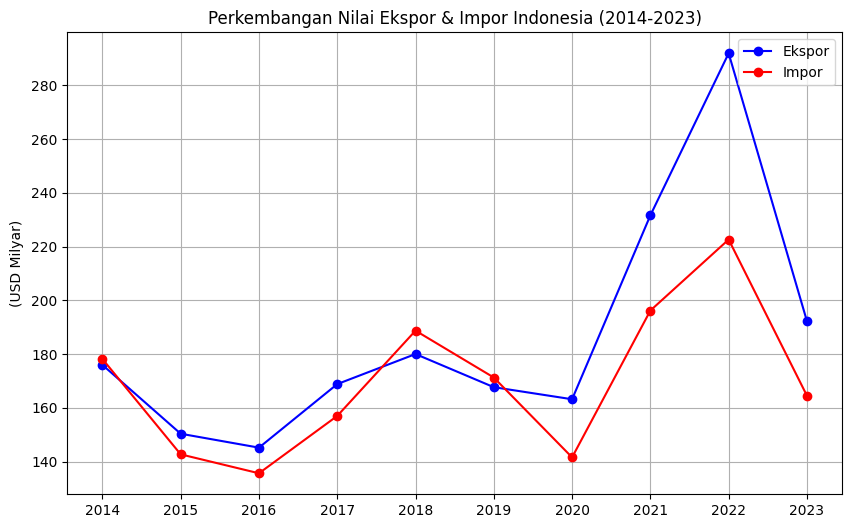

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from matplotlib.ticker import FuncFormatter

# Set locale untuk format mata uang
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Membaca file CSV
all_df = pd.read_csv("Data_Ekspor_Impor_Indonesia_BPS.csv")

# Mengubah tipe data kolom "Bulan" menjadi datetime
all_df['Bulan'] = pd.to_datetime(all_df['Bulan'], format='%Y-%m-%d')

# Inisialisasi list untuk menyimpan total nilai ekspor dan impor, serta tahun
tahun_list = []
total_nilai_ekspor_list = []
total_nilai_impor_list = []

# Iterasi melalui setiap tahun
for tahun in range(2014, 2024):
    # Filter data untuk tahun tertentu
    data_ekspor_impor_tahun = all_df[all_df['Bulan'].dt.year == tahun]

    # Menghitung total nilai ekspor & impor untuk tahun tertentu
    total_nilai_ekspor_tahun = data_ekspor_impor_tahun['Nilai Ekspor (US $)'].sum()
    total_nilai_impor_tahun = data_ekspor_impor_tahun['Nilai Impor (US $)'].sum()
    # Menampilkan hasil dengan format mata uang USD
    # print(f"Total Nilai Ekspor (USD) Tahun ({tahun}): {locale.currency(total_nilai_ekspor_tahun, grouping=True)}")
    # print(f"Total Nilai Impor (USD) Tahun ({tahun}): {locale.currency(total_nilai_impor_tahun, grouping=True)}")
    
    # Menghitung total nilai ekspor untuk tahun tertentu
    total_nilai_ekspor_tahun = data_ekspor_impor_tahun['Nilai Ekspor (US $)'].sum()
    
    # Menghitung total nilai impor untuk tahun tertentu
    total_nilai_impor_tahun = data_ekspor_impor_tahun['Nilai Impor (US $)'].sum()
    
    # Menyimpan hasil ke dalam list
    tahun_list.append(tahun)
    total_nilai_ekspor_list.append(total_nilai_ekspor_tahun)
    total_nilai_impor_list.append(total_nilai_impor_tahun)

# Membuat grafik line chart
plt.figure(figsize=(10, 6))
plt.plot(tahun_list, total_nilai_ekspor_list, marker='o', linestyle='-', color='b', label='Ekspor')
plt.plot(tahun_list, total_nilai_impor_list, marker='o', linestyle='-', color='r', label='Impor')
plt.title('Perkembangan Nilai Ekspor & Impor Indonesia (2014-2023)')
plt.ylabel('(USD Milyar)', labelpad=5)

# Mengonfigurasi formatter untuk mengubah angka menjadi format miliar
def format_miliar(value, _):
    return f"{value/1e9:.0f}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_miliar))

# Menetapkan label sumbu x untuk menampilkan semua tahun
plt.xticks(tahun_list)

plt.legend()
plt.grid(True)
plt.show()

### 2. Bagaimana Perkembangan Berat Ekspor & Impor Indonesia dalam Beberapa Tahun Terakhir?

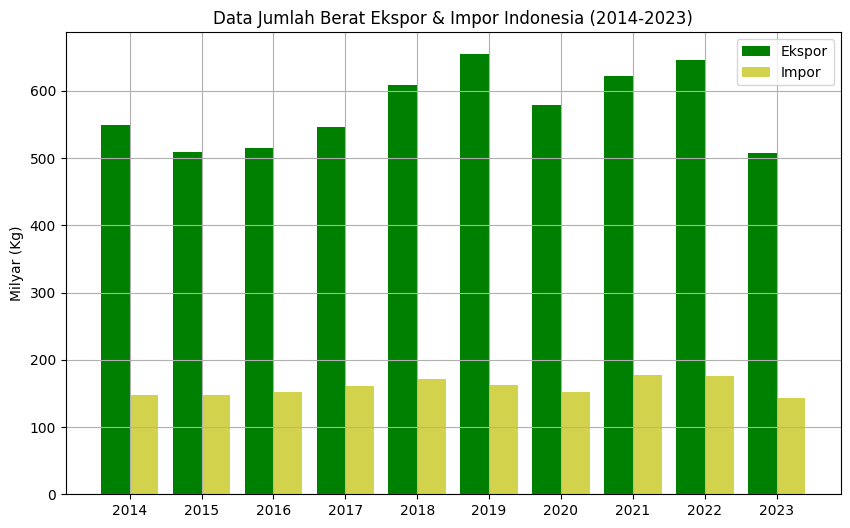

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Membaca file CSV
all_df = pd.read_csv("Data_Ekspor_Impor_Indonesia_BPS.csv")

# Mengubah tipe data kolom "Bulan" menjadi datetime
all_df['Bulan'] = pd.to_datetime(all_df['Bulan'], format='%Y-%m-%d')

# Inisialisasi list untuk menyimpan total berat ekspor dan impor, serta tahun
tahun_list = []
total_berat_ekspor_list = []
total_berat_impor_list = []

# Iterasi melalui setiap tahun
for tahun in range(2014, 2024):
    # Filter data untuk tahun tertentu
    data_ekspor_impor_tahun = all_df[all_df['Bulan'].dt.year == tahun]

    # Menghitung total berat ekspor & impor untuk tahun tertentu
    total_berat_ekspor_tahun = data_ekspor_impor_tahun['Berat Ekspor (KG)'].sum()
    total_berat_impor_tahun = data_ekspor_impor_tahun['Berat Impor (KG)'].sum()

    # Menampilkan hasil
    # print(f"Total Berat Ekspor (KG) Tahun ({tahun}): {total_berat_ekspor_tahun:,.2f} Kg")
    # print(f"Total Berat Impor (KG) Tahun ({tahun}): {total_berat_impor_tahun:,.2f} Kg")

    # Menyimpan hasil ke dalam list
    tahun_list.append(tahun)
    total_berat_ekspor_list.append(total_berat_ekspor_tahun)
    total_berat_impor_list.append(total_berat_impor_tahun)

# Membuat dua grafik bar chart yang terpisah
plt.figure(figsize=(10, 6))

# Mengonfigurasi formatter untuk mengubah angka menjadi format miliar
def format_miliar(value, _):
    return f"{value/1e9:.0f}"

# Bar chart untuk berat ekspor
plt.bar([tahun - 0.2 for tahun in tahun_list], total_berat_ekspor_list, width=0.4, color='g', label='Ekspor')

# Bar chart untuk berat impor
plt.bar([tahun + 0.2 for tahun in tahun_list], total_berat_impor_list, width=0.4, color='y', label='Impor', alpha=0.7)

plt.title('Data Jumlah Berat Ekspor & Impor Indonesia (2014-2023)')
plt.ylabel('Milyar (Kg)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_miliar))

# Menetapkan label sumbu x untuk menampilkan semua tahun
plt.xticks(tahun_list)

plt.legend()
plt.grid(True)
plt.show()

### 3. Bagaimana Neraca Perdagangan Indonesia dalam Beberapa Tahun Terakhir?

Neraca Perdagangan Tahun (2014): -$2,198,976.10
Neraca Perdagangan Tahun (2015): $7,671,487.28
Neraca Perdagangan Tahun (2016): $9,533,394.75
Neraca Perdagangan Tahun (2017): $11,842,612.21
Neraca Perdagangan Tahun (2018): -$8,698,676.19
Neraca Perdagangan Tahun (2019): -$3,592,740.86
Neraca Perdagangan Tahun (2020): $21,623,043.53
Neraca Perdagangan Tahun (2021): $35,419,500.50
Neraca Perdagangan Tahun (2022): $69,289,519.08
Neraca Perdagangan Tahun (2023): $27,740,461.29


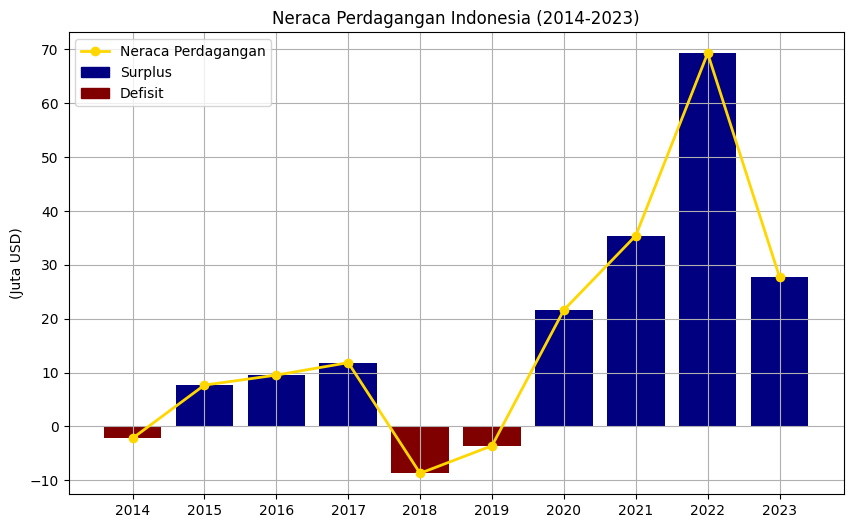

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Membaca file CSV
all_df = pd.read_csv("Data_Ekspor_Impor_Indonesia_BPS.csv")

# Mengubah tipe data kolom "Bulan" menjadi datetime
all_df['Bulan'] = pd.to_datetime(all_df['Bulan'], format='%Y-%m-%d')

# Inisialisasi list untuk menyimpan total nilai ekspor dan impor, serta tahun
tahun_list = []
nilai_ekspor_list = []
nilai_impor_list = []

# Iterasi melalui setiap tahun
for tahun in range(2014, 2024):
    # Filter data untuk tahun tertentu
    data_ekspor_impor_tahun = all_df[all_df['Bulan'].dt.year == tahun]

    # Menghitung total nilai ekspor untuk tahun tertentu
    total_nilai_ekspor_tahun = data_ekspor_impor_tahun['Nilai Ekspor (US $)'].sum()

    # Menghitung total nilai impor untuk tahun tertentu
    total_nilai_impor_tahun = data_ekspor_impor_tahun['Nilai Impor (US $)'].sum()

    # Menyimpan hasil ke dalam list
    tahun_list.append(tahun)
    nilai_ekspor_list.append(total_nilai_ekspor_tahun)
    nilai_impor_list.append(total_nilai_impor_tahun)

# Menghitung neraca perdagangan
neraca_perdagangan_list = [ekspor - impor for ekspor, impor in zip(nilai_ekspor_list, nilai_impor_list)]

# Membuat DataFrame untuk neraca perdagangan
neraca_perdagangan_df = pd.DataFrame({
    'Tahun': tahun_list,
    'Neraca Perdagangan (US $)': neraca_perdagangan_list
})

# Set locale untuk format mata uang
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Menampilkan hasil dengan format mata uang USD
for tahun, nilai in zip(tahun_list, neraca_perdagangan_list):
    formatted_nilai = locale.currency(abs(nilai) / 1e3, grouping=True)
    sign = "" if nilai >= 0 else "-"
    print(f"Neraca Perdagangan Tahun ({tahun}): {sign}{formatted_nilai}")

# Membuat grafik line dan bar chart dengan warna berbeda
plt.figure(figsize=(10, 6))
bar_colors = ['navy' if nilai >= 0 else 'maroon' for nilai in neraca_perdagangan_list]
plt.bar(neraca_perdagangan_df['Tahun'], neraca_perdagangan_df['Neraca Perdagangan (US $)'] / 1e9, color=bar_colors, alpha=1.0)
plt.plot(neraca_perdagangan_df['Tahun'], neraca_perdagangan_df['Neraca Perdagangan (US $)'] / 1e9, marker='o', linestyle='-', color='gold', label='Neraca Perdagangan', linewidth=2.0)
plt.fill_between([], [], color='navy', alpha=1.0, label='Surplus')
plt.fill_between([], [], color='maroon', alpha=1.0, label='Defisit')

plt.title('Neraca Perdagangan Indonesia (2014-2023)')
plt.ylabel('(Juta USD)')
plt.xticks(tahun_list)
plt.legend()
plt.grid(True)
plt.show()


### 4. Bagaimana Pertumbuhan (%) Nilai Ekspor & Impor Indonesia dalam Beberapa Tahun Terakhir?

Tahun 2014: Waktu Mulai
Tahun 2015: Pertumbuhan Ekspor: -14.55%, Pertumbuhan Impor: -19.91%
Tahun 2016: Pertumbuhan Ekspor: -3.44%, Pertumbuhan Impor: -4.93%
Tahun 2017: Pertumbuhan Ekspor: 16.28%, Pertumbuhan Impor: 15.73%
Tahun 2018: Pertumbuhan Ekspor: 6.62%, Pertumbuhan Impor: 20.21%
Tahun 2019: Pertumbuhan Ekspor: -6.85%, Pertumbuhan Impor: -9.24%
Tahun 2020: Pertumbuhan Ekspor: -2.68%, Pertumbuhan Impor: -17.34%
Tahun 2021: Pertumbuhan Ekspor: 41.92%, Pertumbuhan Impor: 38.58%
Tahun 2022: Pertumbuhan Ekspor: 26.03%, Pertumbuhan Impor: 13.47%
Tahun 2023: Pertumbuhan Ekspor: -34.14%, Pertumbuhan Impor: -26.10%


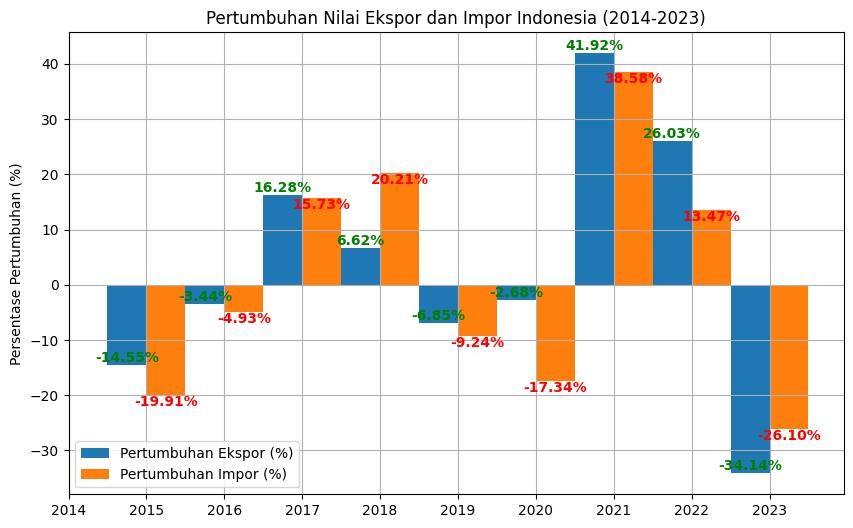

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Set locale untuk format mata uang
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Membaca file CSV
all_df = pd.read_csv("Data_Ekspor_Impor_Indonesia_BPS.csv")

# Mengubah tipe data kolom "Bulan" menjadi datetime
all_df['Bulan'] = pd.to_datetime(all_df['Bulan'], format='%Y-%m-%d')

# Inisialisasi list untuk menyimpan total nilai ekspor dan impor, serta tahun
tahun_list = []
total_nilai_ekspor_list = []
total_nilai_impor_list = []

# Iterasi melalui setiap tahun
for tahun in range(2014, 2024):
    # Filter data untuk tahun tertentu
    data_ekspor_impor_tahun = all_df[all_df['Bulan'].dt.year == tahun]

    # Menghitung total nilai ekspor & impor untuk tahun tertentu
    total_nilai_ekspor_tahun = data_ekspor_impor_tahun['Nilai Ekspor (US $)'].sum()
    total_nilai_impor_tahun = data_ekspor_impor_tahun['Nilai Impor (US $)'].sum()

    # Menyimpan hasil ke dalam list
    tahun_list.append(tahun)
    total_nilai_ekspor_list.append(total_nilai_ekspor_tahun)
    total_nilai_impor_list.append(total_nilai_impor_tahun)

# Membuat DataFrame untuk total nilai ekspor dan impor
total_nilai_df = pd.DataFrame({
    'Tahun': tahun_list,
    'Total Nilai Ekspor (US $)': total_nilai_ekspor_list,
    'Total Nilai Impor (US $)': total_nilai_impor_list
})

# Menambahkan kolom persentase pertumbuhan ekspor dan impor
total_nilai_df['Pertumbuhan Ekspor (%)'] = total_nilai_df['Total Nilai Ekspor (US $)'].pct_change() * 100
total_nilai_df['Pertumbuhan Impor (%)'] = total_nilai_df['Total Nilai Impor (US $)'].pct_change() * 100

# Menampilkan DataFrame hasil
for i in range(len(tahun_list)):
    if i == 0:
        print(f"Tahun {tahun_list[i]}: Waktu Mulai")
    else:
        pertumbuhan_ekspor = total_nilai_df.at[i, 'Pertumbuhan Ekspor (%)']
        pertumbuhan_impor = total_nilai_df.at[i, 'Pertumbuhan Impor (%)']
        print(f"Tahun {tahun_list[i]}: Pertumbuhan Ekspor: {pertumbuhan_ekspor:.2f}%, Pertumbuhan Impor: {pertumbuhan_impor:.2f}%")

# Plotting grafik batang
plt.figure(figsize=(10, 6))
bar_width = 0.50
plt.bar(total_nilai_df['Tahun'] - bar_width/2, total_nilai_df['Pertumbuhan Ekspor (%)'], bar_width, label='Pertumbuhan Ekspor (%)')
plt.bar(total_nilai_df['Tahun'] + bar_width/2, total_nilai_df['Pertumbuhan Impor (%)'], bar_width, label='Pertumbuhan Impor (%)')

# Menambahkan keterangan dalam grafik
for i in range(len(tahun_list)):
    pertumbuhan_ekspor = total_nilai_df.at[i, 'Pertumbuhan Ekspor (%)']
    pertumbuhan_impor = total_nilai_df.at[i, 'Pertumbuhan Impor (%)']
    
    # Memeriksa apakah nilai pertumbuhan valid sebelum menggunakan plt.text
    if pd.notna(pertumbuhan_ekspor):
        plt.text(total_nilai_df['Tahun'][i] - bar_width/2, pertumbuhan_ekspor, f'{pertumbuhan_ekspor:.2f}%', ha='center', va='bottom', fontweight='bold', color='green')

    if pd.notna(pertumbuhan_impor):
        plt.text(total_nilai_df['Tahun'][i] + bar_width/2, pertumbuhan_impor, f'{pertumbuhan_impor:.2f}%', ha='center', va='top', fontweight='bold', color='red')

plt.title('Pertumbuhan Nilai Ekspor dan Impor Indonesia (2014-2023)')
plt.ylabel('Persentase Pertumbuhan (%)')
plt.xticks(tahun_list)
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import plotly.graph_objects as go

# Plotting grafik batang 3D
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tahun_list,
    y=total_nilai_df['Pertumbuhan Ekspor (%)'],
    name='Pertumbuhan Ekspor (%)',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=tahun_list,
    y=total_nilai_df['Pertumbuhan Impor (%)'],
    name='Pertumbuhan Impor (%)',
    marker=dict(color='orange')
))

# Menambahkan keterangan dalam grafik
for i in range(len(tahun_list)):
    pertumbuhan_ekspor = total_nilai_df.at[i, 'Pertumbuhan Ekspor (%)']
    pertumbuhan_impor = total_nilai_df.at[i, 'Pertumbuhan Impor (%)']

    # Memeriksa apakah nilai pertumbuhan valid sebelum menggunakan plt.text
    if pd.notna(pertumbuhan_ekspor):
        fig.add_annotation(
            x=tahun_list[i],
            y=pertumbuhan_ekspor,
            text=f'{pertumbuhan_ekspor:.2f}%',
            showarrow=True,
            arrowhead=5,
            ax=0,
            ay=-40
        )

    if pd.notna(pertumbuhan_impor):
        fig.add_annotation(
            x=tahun_list[i],
            y=pertumbuhan_impor,
            text=f'{pertumbuhan_impor:.2f}%',
            showarrow=True,
            arrowhead=5,
            ax=0,
            ay=40
        )

fig.update_layout(
    title='Pertumbuhan Nilai Ekspor dan Impor Indonesia (2014-2023)',
    xaxis=dict(tickmode='array', tickvals=tahun_list),
    yaxis=dict(title='Persentase Pertumbuhan (%)'),
    barmode='stack'
)

fig.show()
